In [105]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score,r2_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.preprocessing import StandardScaler

In [106]:
nba=pd.read_csv('nba_2013.csv')

In [107]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [108]:
nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [109]:
print(nba.season_end.nunique()) #since all the values are same we can drop this columns
print(nba.season.nunique())

1
1


In [110]:
nba.drop(nba[['season_end','season']], axis=1, inplace=True)

In [111]:
nba.shape

(481, 29)

In [112]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,0.660,72,144,216,28,23,26,30,122,171
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,0.581,142,190,332,43,40,57,71,203,265
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,0.639,102,204,306,38,24,36,39,108,362
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,0.815,32,230,262,248,35,3,146,136,1330
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,0.836,94,183,277,40,23,46,63,187,328


In [113]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [114]:
#dropping irrelevent columns
nba.drop(nba[['player','pos','bref_team_id']],axis=1, inplace=True)

In [115]:
nba.shape

(481, 26)

In [116]:
nba.isna().sum()

age      0
g        0
gs       0
mp       0
fg       0
fga      0
fg.      2
x3p      0
x3pa     0
x3p.    67
x2p      0
x2pa     0
x2p.     3
efg.     2
ft       0
fta      0
ft.     20
orb      0
drb      0
trb      0
ast      0
stl      0
blk      0
tov      0
pf       0
pts      0
dtype: int64

In [117]:
#replacing missing values 
nba['fg.'].fillna(nba['fg.'].median(), inplace=True)
nba['x3p.'].fillna(nba['x3p.'].median(), inplace=True)
nba['ft.'].fillna(nba['ft.'].median(), inplace=True)
nba['x2p.'].fillna(nba['x2p.'].median(), inplace=True)
nba['efg.'].fillna(nba['efg.'].median(), inplace=True)

## EDA

In [ ]:
import pandas_profiling
nba.profile_report()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pts', ylabel='Density'>

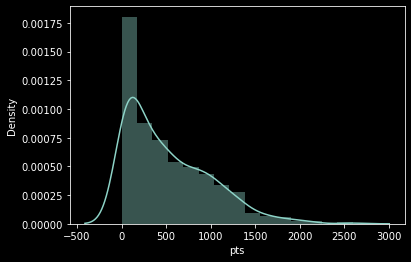

In [118]:
plt.style.use('dark_background')
sns.distplot(nba.pts)

<AxesSubplot:xlabel='pts', ylabel='g'>

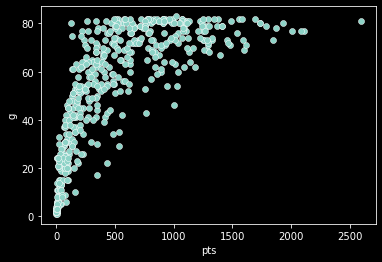

In [119]:
 sns.scatterplot(data=nba, x='pts',y='g')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pts'>

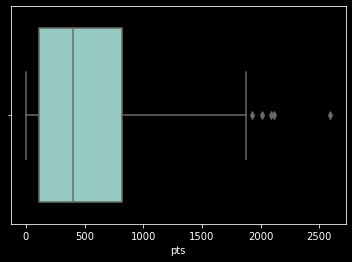

In [120]:
sns.boxplot(nba.pts) #there were some outliers in the pts

In [121]:
X=nba.drop(['pts'],axis=1)
y=nba.pts

In [122]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25,random_state=11 )

In [126]:
y_test.shape

(121,)

In [127]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform( X_test )

In [128]:
knnr=KNeighborsRegressor()
knnr.fit(X_train_norm,y_train)

KNeighborsRegressor()

In [129]:
knnr.score(X_train_norm,y_train) #train score

0.8122725054216733

In [130]:
knnr.score(X_test_norm,y_test) #test score has been decreased

0.744041379610813

In [131]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [132]:
gridsearch = GridSearchCV(knnr, param_grid,verbose=3)

In [133]:
gridsearch.fit(X_train_norm,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, l

[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=10; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=10; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=10; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=12; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=12; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=12; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=12; total time=   0.0s
[CV 

[CV 2/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=11; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=11; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=11; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=11; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=12; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=12; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=12; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=12; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=12; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=13; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=13; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=13; total time=   0.0s
[CV 

[CV 1/5] END .algorithm=kd_tree, leaf_size=20, n_neighbors=9; total time=   0.0s
[CV 2/5] END .algorithm=kd_tree, leaf_size=20, n_neighbors=9; total time=   0.0s
[CV 3/5] END .algorithm=kd_tree, leaf_size=20, n_neighbors=9; total time=   0.0s
[CV 4/5] END .algorithm=kd_tree, leaf_size=20, n_neighbors=9; total time=   0.0s
[CV 5/5] END .algorithm=kd_tree, leaf_size=20, n_neighbors=9; total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=10; total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=10; total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=10; total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=10; total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=10; total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=11; total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=11; total time=   0.0s
[CV 3/5] END algorithm=kd_tr

[CV 4/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=13; total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=13; total time=   0.0s
[CV 1/5] END .algorithm=kd_tree, leaf_size=30, n_neighbors=3; total time=   0.0s
[CV 2/5] END .algorithm=kd_tree, leaf_size=30, n_neighbors=3; total time=   0.0s
[CV 3/5] END .algorithm=kd_tree, leaf_size=30, n_neighbors=3; total time=   0.0s
[CV 4/5] END .algorithm=kd_tree, leaf_size=30, n_neighbors=3; total time=   0.0s
[CV 5/5] END .algorithm=kd_tree, leaf_size=30, n_neighbors=3; total time=   0.0s
[CV 1/5] END .algorithm=kd_tree, leaf_size=30, n_neighbors=5; total time=   0.0s
[CV 2/5] END .algorithm=kd_tree, leaf_size=30, n_neighbors=5; total time=   0.0s
[CV 3/5] END .algorithm=kd_tree, leaf_size=30, n_neighbors=5; total time=   0.0s
[CV 4/5] END .algorithm=kd_tree, leaf_size=30, n_neighbors=5; total time=   0.0s
[CV 5/5] END .algorithm=kd_tree, leaf_size=30, n_neighbors=5; total time=   0.0s
[CV 1/5] END .algorithm=kd_t

[CV 5/5] END ...algorithm=brute, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 1/5] END ...algorithm=brute, leaf_size=18, n_neighbors=7; total time=   0.0s
[CV 2/5] END ...algorithm=brute, leaf_size=18, n_neighbors=7; total time=   0.0s
[CV 3/5] END ...algorithm=brute, leaf_size=18, n_neighbors=7; total time=   0.0s
[CV 4/5] END ...algorithm=brute, leaf_size=18, n_neighbors=7; total time=   0.0s
[CV 5/5] END ...algorithm=brute, leaf_size=18, n_neighbors=7; total time=   0.0s
[CV 1/5] END ...algorithm=brute, leaf_size=18, n_neighbors=9; total time=   0.0s
[CV 2/5] END ...algorithm=brute, leaf_size=18, n_neighbors=9; total time=   0.0s
[CV 3/5] END ...algorithm=brute, leaf_size=18, n_neighbors=9; total time=   0.0s
[CV 4/5] END ...algorithm=brute, leaf_size=18, n_neighbors=9; total time=   0.0s
[CV 5/5] END ...algorithm=brute, leaf_size=18, n_neighbors=9; total time=   0.0s
[CV 1/5] END ..algorithm=brute, leaf_size=18, n_neighbors=10; total time=   0.0s
[CV 2/5] END ..algorithm=bru

[CV 4/5] END ..algorithm=brute, leaf_size=25, n_neighbors=12; total time=   0.0s
[CV 5/5] END ..algorithm=brute, leaf_size=25, n_neighbors=12; total time=   0.0s
[CV 1/5] END ..algorithm=brute, leaf_size=25, n_neighbors=13; total time=   0.0s
[CV 2/5] END ..algorithm=brute, leaf_size=25, n_neighbors=13; total time=   0.0s
[CV 3/5] END ..algorithm=brute, leaf_size=25, n_neighbors=13; total time=   0.0s
[CV 4/5] END ..algorithm=brute, leaf_size=25, n_neighbors=13; total time=   0.0s
[CV 5/5] END ..algorithm=brute, leaf_size=25, n_neighbors=13; total time=   0.0s
[CV 1/5] END ...algorithm=brute, leaf_size=27, n_neighbors=3; total time=   0.0s
[CV 2/5] END ...algorithm=brute, leaf_size=27, n_neighbors=3; total time=   0.0s
[CV 3/5] END ...algorithm=brute, leaf_size=27, n_neighbors=3; total time=   0.0s
[CV 4/5] END ...algorithm=brute, leaf_size=27, n_neighbors=3; total time=   0.0s
[CV 5/5] END ...algorithm=brute, leaf_size=27, n_neighbors=3; total time=   0.0s
[CV 1/5] END ...algorithm=br

[CV 5/5] END ...algorithm=brute, leaf_size=34, n_neighbors=3; total time=   0.0s
[CV 1/5] END ...algorithm=brute, leaf_size=34, n_neighbors=5; total time=   0.0s
[CV 2/5] END ...algorithm=brute, leaf_size=34, n_neighbors=5; total time=   0.0s
[CV 3/5] END ...algorithm=brute, leaf_size=34, n_neighbors=5; total time=   0.0s
[CV 4/5] END ...algorithm=brute, leaf_size=34, n_neighbors=5; total time=   0.0s
[CV 5/5] END ...algorithm=brute, leaf_size=34, n_neighbors=5; total time=   0.0s
[CV 1/5] END ...algorithm=brute, leaf_size=34, n_neighbors=7; total time=   0.0s
[CV 2/5] END ...algorithm=brute, leaf_size=34, n_neighbors=7; total time=   0.0s
[CV 3/5] END ...algorithm=brute, leaf_size=34, n_neighbors=7; total time=   0.0s
[CV 4/5] END ...algorithm=brute, leaf_size=34, n_neighbors=7; total time=   0.0s
[CV 5/5] END ...algorithm=brute, leaf_size=34, n_neighbors=7; total time=   0.0s
[CV 1/5] END ...algorithm=brute, leaf_size=34, n_neighbors=9; total time=   0.0s
[CV 2/5] END ...algorithm=br

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [134]:
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 5}

In [135]:
knn = KNeighborsRegressor(algorithm = 'ball_tree', leaf_size =18, n_neighbors =5)

In [136]:
knn.fit(X_train_norm,y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=18)

In [137]:
knn.score(X_train_norm,y_train)

0.8122725054216733

In [138]:
knn.score(X_test_norm,y_test)

0.744041379610813

In [139]:
from sklearn.metrics import mean_squared_error

In [143]:
y_pred = knn.predict(X_test_norm) 
print("RMSE is ",np.sqrt(mean_squared_error(y_pred,y_test)))

RMSE is  229.56983344889213
